# Naive Bayes

In [1]:
import pandas as pd

# Carregar o dataset a partir do arquivo CSV
file_path = r'C:\Users\victor\OneDrive\Documentos\GitHub\InteligenciaArtificial_Projeto1\Dataset_Ar\mitbih_train.csv'
dataset = pd.read_csv(file_path)

file_path_teste = r'C:\Users\victor\OneDrive\Documentos\GitHub\InteligenciaArtificial_Projeto1\Dataset_Ar\mitbih_test.csv'
ds_teste = pd.read_csv(file_path_teste)

# Exibir as primeiras linhas do dataset para conferir se foi carregado corretamente
dataset.head()

,9.779411554336547852e-01,9.264705777168273926e-01,6.813725233078002930e-01,2.450980395078659058e-01,1.544117629528045654e-01,1.911764740943908691e-01,1.519607901573181152e-01,8.578431606292724609e-02,5.882352963089942932e-02,4.901960864663124084e-02,...,0.000000000000000000e+00.79,0.000000000000000000e+00.80,0.000000000000000000e+00.81,0.000000000000000000e+00.82,0.000000000000000000e+00.83,0.000000000000000000e+00.84,0.000000000000000000e+00.85,0.000000000000000000e+00.86,0.000000000000000000e+00.87,0.000000000000000000e+00.88
0,0.960114,0.863248,0.461538,0.196581,0.094017,0.125356,0.099715,0.088319,0.074074,0.082621,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.000000,0.659459,0.186486,0.070270,0.070270,0.059459,0.056757,0.043243,0.054054,0.045946,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.925414,0.665746,0.541436,0.276243,0.196133,0.077348,0.071823,0.060773,0.066298,0.058011,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.967136,1.000000,0.830986,0.586854,0.356808,0.248826,0.145540,0.089202,0.117371,0.150235,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.927461,1.000000,0.626943,0.193437,0.094991,0.072539,0.043178,0.053541,0.093264,0.189983,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
from sklearn.preprocessing import LabelEncoder 

entrada = dataset.iloc[:, :187]
saida = dataset.iloc[:, -1]

teste = ds_teste.iloc[:, :187]
saida_teste = ds_teste.iloc[:, -1]

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split

# Normalizar os dados usando StandardScaler
scaler = StandardScaler()
entrada_scaled = scaler.fit_transform(entrada)  # Aplica o scaling

# Reduzir as dimensões com PCA
pca = PCA(n_components=2)
entrada_pca = pca.fit_transform(entrada_scaled)  # Aplica o PCA

In [4]:
from sklearn.naive_bayes import GaussianNB

gaussian = GaussianNB()
gaussian.fit(entrada_pca, saida)

GaussianNB()

In [5]:
# Ensure the test data columns match the training data columns
teste.columns = entrada.columns

# Apply the same scaling and PCA transformation to the test data
teste_scaled = scaler.transform(teste)
teste_pca = pca.transform(teste_scaled)

# Fazer previsões
previsao = gaussian.predict(teste_pca)
print(previsao)

[0. 0. 0. ... 0. 0. 0.]


In [ ]:
def classToArithimia(classe):
    if classe == 0:
        return 'N: normal'
    elif classe == 1:
        return 'S: supra ventricular'
    elif classe == 2:
        return 'V: extrassístole ventricular'
    elif classe == 3:
        return 'F: batimento de fusão'
    elif classe == 4:
        return 'Q: desconhecido'
    else:
        return 'Classe inválida'

# Apply the function to each element in the previsao array
previsao_classes = list(map(classToArithimia, previsao))

# Print the results
print(previsao_classes)

['Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'F: batimento de fusão', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'F: batimento de fusão', 'Q: desconhecido', 'N: normal', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'N: normal', 'N: normal', 'N: normal', 'F: batimento de fusão', 'V: extrassístole ventricular', 'N: normal', 'Q: desconhecido', 'F: batimento de fusão', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'F: batimento de fusão', 'F: batimento de fusão', 'F: batimento de fusão', 'Q: desconhecido', 'Q: desconhecido', 'V: extrassístole ventricular', 'F: batimento de fusão', 'N: normal', 'Q: desconhecido', 'V: extrassístole ventricular', 'N: normal', 'Q: desconhecido', 'N: normal', 'F: batimento de fusão', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: desconhecido', 'Q: 

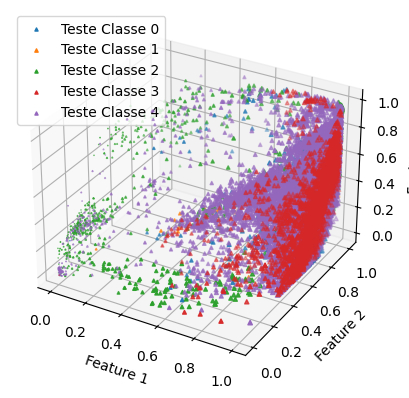

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

import matplotlib.pyplot as plt

# Cria um gráfico 3D para visualizar as dimensões do dataset
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Usar a quarta dimensão para definir o tamanho dos pontos
# O tamanho dos pontos é proporcional ao valor da primeira coluna
sizes = entrada.iloc[:, 0] * 10  # Multiplica por 50 para aumentar visibilidade

# Adicionar rótulos aos eixos
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Feature 3')

# Usar a quarta dimensão para definir o tamanho dos pontos do teste
sizes_teste = teste.iloc[:, 0] * 10  # Multiplica por 50 para aumentar visibilidade

# Plota os pontos de teste com cores diferentes para cada classe prevista
for i in range(len(saida.unique())):
    class_data_teste = teste[previsao == i]
    ax.scatter(class_data_teste.iloc[:, 0], class_data_teste.iloc[:, 1], class_data_teste.iloc[:, 2], s=sizes_teste[previsao == i], label=f'Teste Classe {i}', marker='^')

# Adicionar legenda para os pontos de teste
ax.legend()

# Exibir o gráfico
plt.show()